### Single Reaction with two substrates and optimal artificial data.

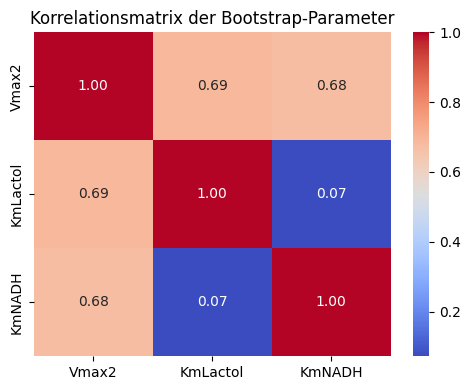

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

# Modellfunktion
def model(concentration_data, Vmax2, KmLactol, KmNADH):
    S1, S2 = concentration_data
    V_obs = (Vmax2 * S1 * S2) / ((KmLactol + S1) * (KmNADH + S2))
    return V_obs

# Parameter
KmLactol_true = 1.2
KmNADH_true = 0.3
Vmax2_true = 2.5

# Optimal verteilte Substratdaten
num_points = 28
S1 = np.linspace(0.1 * KmLactol_true, 10 * KmLactol_true, num_points)
S2 = np.linspace(0.1 * KmNADH_true, 10 * KmNADH_true, num_points)
S1_grid, S2_grid = np.meshgrid(S1, S2)
S1_flat = S1_grid.flatten()
S2_flat = S2_grid.flatten()

# Generiere künstliche Messwerte mit Rauschen
np.random.seed(42)
y_data = model((S1_flat, S2_flat), Vmax2_true, KmLactol_true, KmNADH_true) + np.random.normal(0, 0.01, size=S1_flat.shape)

# Parametric Bootstrap
iterations = 300
params_boot = []
for i in range(iterations):
    y_sim = model((S1_flat, S2_flat), Vmax2_true, KmLactol_true, KmNADH_true) + np.random.normal(0, 0.01, size=S1_flat.shape)
    try:
        def fit_func(X, Vmax2, KmLactol, KmNADH):
            S1, S2 = X
            return model((S1, S2), Vmax2, KmLactol, KmNADH)
        popt, _ = curve_fit(fit_func, (S1_flat, S2_flat), y_sim, p0=[2, 1, 0.2])
        params_boot.append(popt)
    except Exception:
        continue
params_boot = np.array(params_boot)

# Korrelationsmatrix
corr = np.corrcoef(params_boot.T)


# Heatmap-Plot
param_names = ["Vmax2", "KmLactol", "KmNADH"]
df = pd.DataFrame(params_boot, columns=param_names)
plt.figure(figsize=(5, 4))
sns.heatmap(corr, annot=True, fmt=".2f", xticklabels=param_names, yticklabels=param_names, cmap="coolwarm")
plt.title("Korrelationsmatrix der Bootstrap-Parameter")
plt.tight_layout()
plt.show()

### Reaction System like the full system but optimal artificial data distribution.

C:\Users\berger\AppData\Local\Temp\ipykernel_28300\1702385888.py:91: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(
c:\Users\berger\AppData\Local\miniforge3\envs\CadetDev\Lib\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\berger\AppData\Local\miniforge3\envs\CadetDev\Lib\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\berger\AppData\Local\miniforge3\envs\CadetDev\Lib\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\berger\AppData\Local\miniforge3\envs\CadetDev\Lib\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


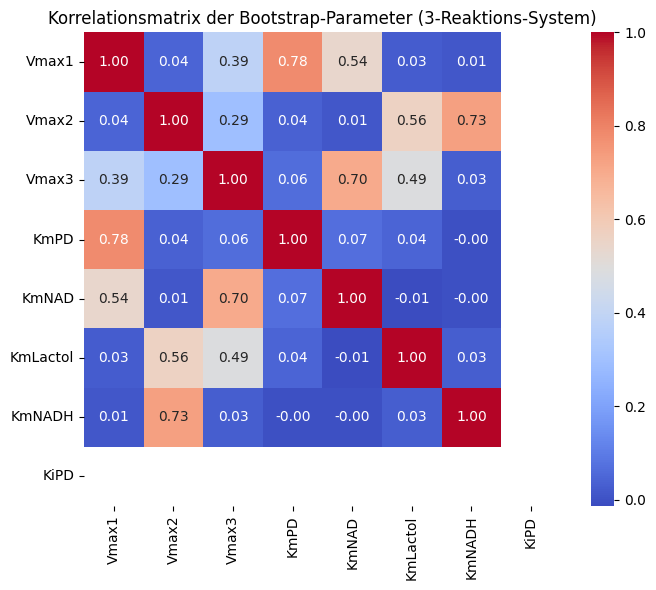

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

# Parameter für alle Reaktionen ("wahre" Werte)
Vmax1_true = 2.0
Vmax2_true = 2.5
Vmax3_true = 2.0
KmPD_true = 80.0
KmNAD_true = 2.0
KmLactol_true = 1.2
KmNADH_true = 0.3
KiPD_true = 90.0

num_points = 28

# Reaktion 1: PD + NAD
S1_r1 = np.linspace(0.1 * KmNAD_true, 10 * KmNAD_true, num_points)  # NAD
S2_r1 = np.linspace(0.1 * KmPD_true, 10 * KmPD_true, num_points)    # PD
S1_r1_grid, S2_r1_grid = np.meshgrid(S1_r1, S2_r1)
S1_r1_flat = S1_r1_grid.flatten()
S2_r1_flat = S2_r1_grid.flatten()
Inhibitor_r1 = np.zeros_like(S1_r1_flat)
reaction_ids_r1 = np.ones_like(S1_r1_flat)

# Reaktion 2: Lactol + NADH
S1_r2 = np.linspace(0.1 * KmLactol_true, 10 * KmLactol_true, num_points)  # Lactol
S2_r2 = np.linspace(0.1 * KmNADH_true, 10 * KmNADH_true, num_points)     # NADH
S1_r2_grid, S2_r2_grid = np.meshgrid(S1_r2, S2_r2)
S1_r2_flat = S1_r2_grid.flatten()
S2_r2_flat = S2_r2_grid.flatten()
Inhibitor_r2 = np.linspace(0, 10, S1_r2_flat.shape[0])  # Variable PD als Inhibitor
reaction_ids_r2 = np.full_like(S1_r2_flat, 2)

# Reaktion 3: Lactol + NAD
S1_r3 = np.linspace(0.1 * KmLactol_true, 10 * KmLactol_true, num_points)  # Lactol
S2_r3 = np.linspace(0.1 * KmNAD_true, 10 * KmNAD_true, num_points)        # NAD
S1_r3_grid, S2_r3_grid = np.meshgrid(S1_r3, S2_r3)
S1_r3_flat = S1_r3_grid.flatten()
S2_r3_flat = S2_r3_grid.flatten()
Inhibitor_r3 = np.zeros_like(S1_r3_flat)
reaction_ids_r3 = np.full_like(S1_r3_flat, 3)

# Alle Daten zusammenführen
S1_all = np.concatenate([S1_r1_flat, S1_r2_flat, S1_r3_flat])
S2_all = np.concatenate([S2_r1_flat, S2_r2_flat, S2_r3_flat])
Inhibitor_all = np.concatenate([Inhibitor_r1, Inhibitor_r2, Inhibitor_r3])
reaction_ids_all = np.concatenate([reaction_ids_r1, reaction_ids_r2, reaction_ids_r3])

# Modellfunktion für das vollständige Drei-Reaktions-System
def full_reaction_system(concentration_data, Vmax1, Vmax2, Vmax3, KmPD, KmNAD, KmLactol, KmNADH, KiPD):
    S1, S2, Inhibitor, reaction_ids = concentration_data
    V_obs = np.zeros_like(S1, dtype=float)
    # Reaktion 1: PD + NAD → HD + NADH
    reaction_1_mask = (reaction_ids == 1)
    if np.any(reaction_1_mask):
        S1_r1 = S1[reaction_1_mask] # NAD
        S2_r1 = S2[reaction_1_mask] # PD
        V_obs[reaction_1_mask] = (Vmax1 * S1_r1 * S2_r1) / ((KmPD + S2_r1) * (KmNAD + S1_r1))
    # Reaktion 2: Lactol + NADH → ... (mit PD Inhibition)
    reaction_2_mask = (reaction_ids == 2)
    if np.any(reaction_2_mask):
        S1_r2 = S1[reaction_2_mask]  # Lactol
        S2_r2 = S2[reaction_2_mask]  # NADH
        PD_inhibitor = Inhibitor[reaction_2_mask]  # Variable PD-Konzentration als Inhibitor
        V_obs[reaction_2_mask] = (Vmax2 * S1_r2 * S2_r2) / ((KmLactol + S1_r2) * (KmNADH + S2_r2))
    # Reaktion 3: Lactol + NAD
    reaction_3_mask = (reaction_ids == 3)
    if np.any(reaction_3_mask):
        S1_r3 = S1[reaction_3_mask]  # Lactol
        S2_r3 = S2[reaction_3_mask]  # NAD
        V_obs[reaction_3_mask] = (Vmax3 * S1_r3 * S2_r3) / ((KmLactol + S1_r3) * (KmNAD + S2_r3))
    return V_obs

# Generiere künstliche Messwerte mit Rauschen
np.random.seed(42)
y_data = full_reaction_system((S1_all, S2_all, Inhibitor_all, reaction_ids_all), Vmax1_true, Vmax2_true, Vmax3_true, KmPD_true, KmNAD_true, KmLactol_true, KmNADH_true, KiPD_true) + np.random.normal(0, 0.01, size=S1_all.shape)

# Parametric Bootstrap für das vollständige Drei-Reaktions-System
iterations = 300
params_boot = []
for i in range(iterations):
    y_sim = full_reaction_system((S1_all, S2_all, Inhibitor_all, reaction_ids_all), Vmax1_true, Vmax2_true, Vmax3_true, KmPD_true, KmNAD_true, KmLactol_true, KmNADH_true, KiPD_true) + np.random.normal(0, 0.01, size=S1_all.shape)
    try:
        def fit_func(X, Vmax1, Vmax2, Vmax3, KmPD, KmNAD, KmLactol, KmNADH, KiPD):
            S1, S2, Inhibitor, reaction_ids = X
            return full_reaction_system((S1, S2, Inhibitor, reaction_ids), Vmax1, Vmax2, Vmax3, KmPD, KmNAD, KmLactol, KmNADH, KiPD)
        p0 = [2.0, 2.5, 2.0, 80.0, 2.0, 1.2, 0.3, 90.0]
        popt, _ = curve_fit(
            fit_func,
            (S1_all, S2_all, Inhibitor_all, reaction_ids_all),
            y_sim,
            p0=p0,
            maxfev=10000
        )
        params_boot.append(popt)
    except Exception:
        continue
params_boot = np.array(params_boot)

# Korrelationsmatrix
corr = np.corrcoef(params_boot.T)


# Heatmap-Plot
param_names = ["Vmax1", "Vmax2", "Vmax3", "KmPD", "KmNAD", "KmLactol", "KmNADH", "KiPD"]
df = pd.DataFrame(params_boot, columns=param_names)
plt.figure(figsize=(7, 6))
sns.heatmap(corr, annot=True, fmt=".2f", xticklabels=param_names, yticklabels=param_names, cmap="coolwarm")
plt.title("Korrelationsmatrix der Bootstrap-Parameter (3-Reaktions-System)")
plt.tight_layout()
plt.show()

### Full system with prossed data

C:\Users\berger\AppData\Local\Temp\ipykernel_28300\1618447965.py:53: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(
c:\Users\berger\AppData\Local\miniforge3\envs\CadetDev\Lib\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\berger\AppData\Local\miniforge3\envs\CadetDev\Lib\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


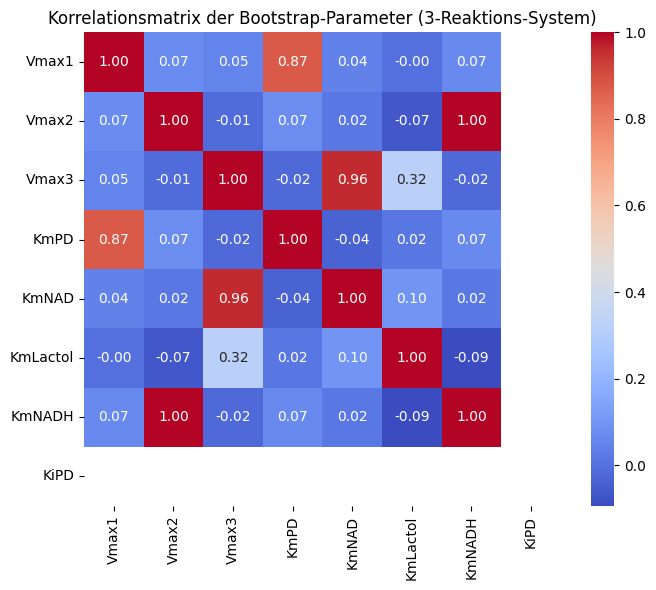

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

data_frame = pd.read_csv(r"C:\Users\berger\Documents\Projekts\enzyme-cascade-analysis\Fehlerfortpflanzunganalyse\Data\full_system_dataframe.csv")

# Alle Daten zusammenführen
S1_all = data_frame['c1'].values
S2_all = data_frame['c2'].values
Inhibitor_all = data_frame['c3'].values
reaction_ids_all = data_frame['reaction'].values

# Modellfunktion für das vollständige Drei-Reaktions-System
def full_reaction_system(concentration_data, Vmax1, Vmax2, Vmax3, KmPD, KmNAD, KmLactol, KmNADH, KiPD):
    S1, S2, Inhibitor, reaction_ids = concentration_data
    V_obs = np.zeros_like(S1, dtype=float)
    # Reaktion 1: PD + NAD → HD + NADH
    reaction_1_mask = (reaction_ids == 1)
    if np.any(reaction_1_mask):
        S1_r1 = S1[reaction_1_mask] # NAD
        S2_r1 = S2[reaction_1_mask] # PD
        V_obs[reaction_1_mask] = (Vmax1 * S1_r1 * S2_r1) / ((KmPD + S2_r1) * (KmNAD + S1_r1))
    # Reaktion 2: Lactol + NADH → ... (mit PD Inhibition)
    reaction_2_mask = (reaction_ids == 2)
    if np.any(reaction_2_mask):
        S1_r2 = S1[reaction_2_mask]  # Lactol
        S2_r2 = S2[reaction_2_mask]  # NADH
        V_obs[reaction_2_mask] = (Vmax2 * S1_r2 * S2_r2) / ((KmLactol + S1_r2) * (KmNADH + S2_r2))
    # Reaktion 3: Lactol + NAD
    reaction_3_mask = (reaction_ids == 3)
    if np.any(reaction_3_mask):
        S1_r3 = S1[reaction_3_mask]  # Lactol
        S2_r3 = S2[reaction_3_mask]  # NAD
        V_obs[reaction_3_mask] = (Vmax3 * S1_r3 * S2_r3) / ((KmLactol + S1_r3) * (KmNAD + S2_r3))
    return V_obs

# Generiere künstliche Messwerte mit Rauschen
np.random.seed(42)
y_data = data_frame['rates'].values  # Angenommen, die Messwerte sind in der Spalte 'V_obs'

# Parametric Bootstrap für das vollständige Drei-Reaktions-System
iterations = 300
params_boot = []
for i in range(iterations):
    y_sim = y_data + np.random.normal(0, 0.01, size=y_data.shape)
    try:
        def fit_func(X, Vmax1, Vmax2, Vmax3, KmPD, KmNAD, KmLactol, KmNADH, KiPD):
            S1, S2, Inhibitor, reaction_ids = X
            return full_reaction_system((S1, S2, Inhibitor, reaction_ids), Vmax1, Vmax2, Vmax3, KmPD, KmNAD, KmLactol, KmNADH, KiPD)
        p0 = [2.0, 2.5, 2.0, 80.0, 2.0, 1.2, 0.3, 90.0]
        popt, _ = curve_fit(
            fit_func,
            (S1_all, S2_all, Inhibitor_all, reaction_ids_all),
            y_sim,
            p0=p0,
            maxfev=10000
        )
        params_boot.append(popt)
    except Exception:
        continue
params_boot = np.array(params_boot)

# Korrelationsmatrix
corr = np.corrcoef(params_boot.T)

# Heatmap-Plot
param_names = ["Vmax1", "Vmax2", "Vmax3", "KmPD", "KmNAD", "KmLactol", "KmNADH", "KiPD"]
df = pd.DataFrame(params_boot, columns=param_names)
plt.figure(figsize=(7, 6))
sns.heatmap(corr, annot=True, fmt=".2f", xticklabels=param_names, yticklabels=param_names, cmap="coolwarm")
plt.title("Korrelationsmatrix der Bootstrap-Parameter (3-Reaktions-System)")
plt.tight_layout()
plt.show()

### Full system with noised row data

 Verarbeitete Reaktionsdaten gespeichert:
   CSV: Results\full_system_processed_reaction_data.csv
   PKL: Results\full_system_processed_reaction_data.pkl

🔬 MONTE CARLO SIMULATION
Modell: Komplettes Drei-Reaktions-System mit Inhibitionen
Iterationen: 100
Kalibrierungs-Rauschen: 1.0%
Reaktions-Rauschen: 1.0%
🔄 Fortschritt:   5.0% (   5/100) | ✅ Erfolg:   5 (100.0%)
🔄 Fortschritt:  10.0% (  10/100) | ✅ Erfolg:  10 (100.0%)
🔄 Fortschritt:  15.0% (  15/100) | ✅ Erfolg:  15 (100.0%)
🔄 Fortschritt:  20.0% (  20/100) | ✅ Erfolg:  20 (100.0%)
🔄 Fortschritt:  25.0% (  25/100) | ✅ Erfolg:  25 (100.0%)
🔄 Fortschritt:  30.0% (  30/100) | ✅ Erfolg:  30 (100.0%)
🔄 Fortschritt:  35.0% (  35/100) | ✅ Erfolg:  35 (100.0%)
🔄 Fortschritt:  40.0% (  40/100) | ✅ Erfolg:  40 (100.0%)
🔄 Fortschritt:  45.0% (  45/100) | ✅ Erfolg:  45 (100.0%)
🔄 Fortschritt:  50.0% (  50/100) | ✅ Erfolg:  50 (100.0%)
🔄 Fortschritt:  55.0% (  55/100) | ✅ Erfolg:  55 (100.0%)
🔄 Fortschritt:  60.0% (  60/100) | ✅ Erfolg:  60 (100

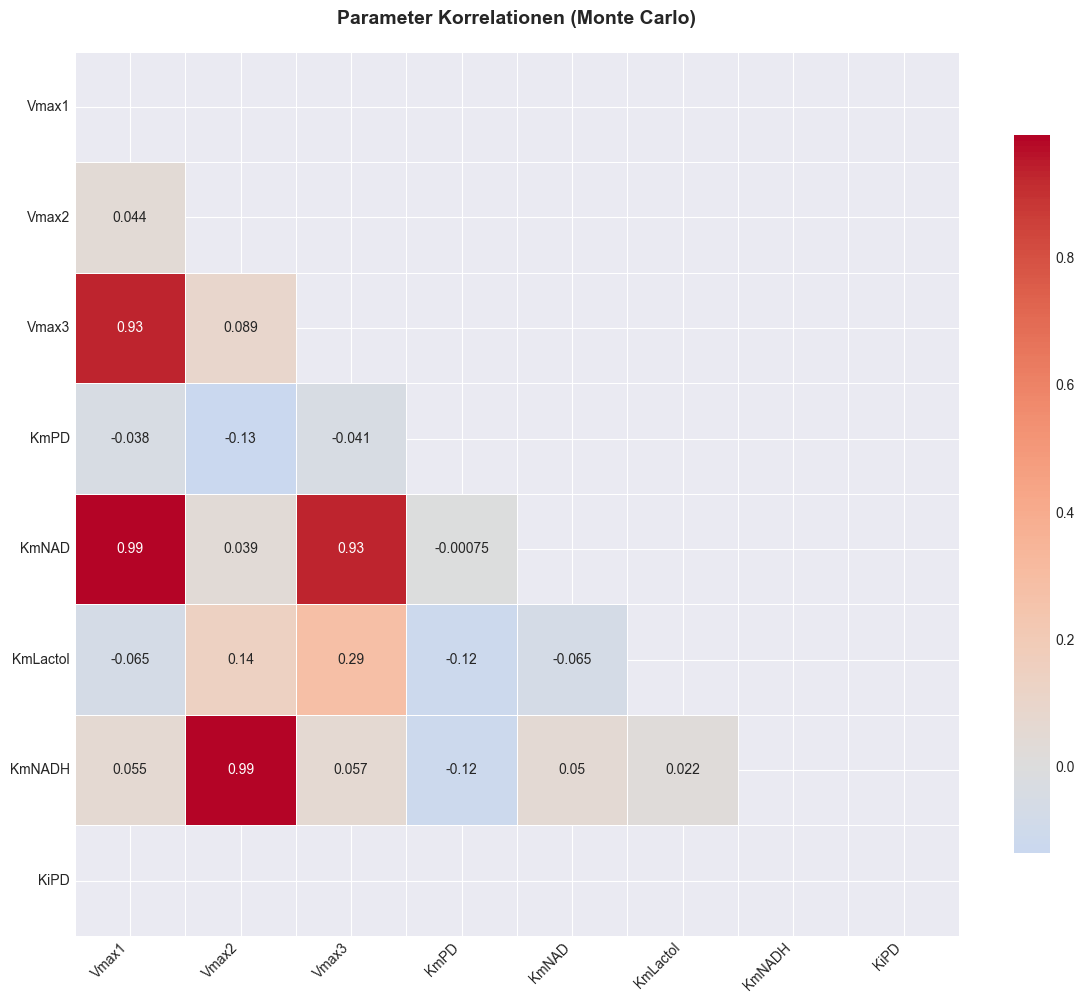

In [4]:
import os
import shutil
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import pickle

import random

from data_handler import  add_noise_reaction_dict, calculate_calibration, add_noise_calibration, create_concentrations_dict, create_reaction_rates_dict, get_rates_and_concentrations , make_fitting_data
from parameter_estimator import estimate_parameters, monte_carlo_simulation

from simulator import cadet_simulation_full_system

from plotter import plot_monte_carlo_results, create_monte_carlo_report, plot_fitting_quality, plot_parameter_convergence, plot_component_analysis



BASE_PATH = r"C:\Users\berger\Documents\Projekts\enzyme-cascade-analysis\Fehlerfortpflanzunganalyse"

calibration_data = pd.read_csv(os.path.join(BASE_PATH, 'Data', 'NADH_Kalibriergerade.csv'))
calibration_slope = calculate_calibration(calibration_data)

r1_path = os.path.join(BASE_PATH, 'Data', 'Reaction1')
r1_nad_data = pd.read_csv(os.path.join(r1_path, 'r_1_NAD_PD_500mM.csv'))
r1_pd_data = pd.read_csv(os.path.join(r1_path, 'r1_PD_NAD_5mM.csv'))


r2_path = os.path.join(BASE_PATH, 'Data', 'Reaction2')
r2_hp_data = pd.read_csv(os.path.join(r2_path, 'r_2_HP_NADH_06mM.csv'))
r2_nadh_data = pd.read_csv(os.path.join(r2_path, 'r_2_NADH_HP_300mM.csv'))
r2_pd_data = pd.read_csv(os.path.join(r2_path, 'r_2_PD_NADH_06mM_HP_300mM.csv'))

r3_path = os.path.join(BASE_PATH, 'Data', 'Reaction3')
r3_lactol = pd.read_csv(os.path.join(r3_path, 'r_3_Lactol_NAD_5mM.csv'))
r3_nad = pd.read_csv(os.path.join(r3_path, 'r_3_NAD_Lactol_500mM.csv'))


full_system_data = {
    "r1": {
        "c1": r1_nad_data,
        "c2": r1_pd_data
    },
    "r2": {
        "c1": r2_hp_data,
        "c2": r2_nadh_data,
        "c3": r2_pd_data
    },
    "r3": {
        "c1": r3_lactol,
        "c2": r3_nad
    }
}


full_system_param = {
    "r1": {
        "Vf_well": 10.0,
        "Vf_prod": 1.0,
        "c_prod": 2.2108,
        "c1_const": 5.0,
        "c2_const": 500.0
    },
    "r2": {
        "Vf_well": 10.0,
        "Vf_prod": 5.0,
        "c_prod": 2.15,
        "c1_const": 300.0,
        "c2_const": 0.6,
        "c3_const": 0.0
    },
    "r3": {
        "Vf_well": 10.0,
        "Vf_prod": 10.0,
        "c_prod": 2.15,
        "c1_const": 500.0,
        "c2_const": 5.0
    },
    "x_dimension": 3,
    "y_dimension": 1
}

df = get_rates_and_concentrations(
    full_system_data,
    calibration_slope,
    full_system_param
)

# Stelle sicher, dass das Results-Verzeichnis existiert
os.makedirs('Results', exist_ok=True)

# Speichere im Results-Ordner
csv_path = os.path.join('Results', "full_system_processed_reaction_data.csv")
pkl_path = os.path.join('Results', "full_system_processed_reaction_data.pkl")

df.to_csv(csv_path, index=True)
df.to_pickle(pkl_path)

print(f" Verarbeitete Reaktionsdaten gespeichert:")
print(f"   CSV: {csv_path}")
print(f"   PKL: {pkl_path}")

def full_reaction_system(concentration_data, Vmax1, Vmax2, Vmax3, KmPD, KmNAD, KmLactol, KmNADH, KiPD):
    """
    Wrapper für curve_fit Kompatibilität - nimmt flache Parameter entgegen
    Berechnet die Enzymaktivität für das vollständige Drei-Reaktions-System
    
    ALLE DREI REAKTIONEN:
    - Reaktion 1: PD + NAD → Pyruvat + NADH
    - Reaktion 2: Lactol + NADH → ... (mit PD/NAD Inhibition)
    - Reaktion 3: Lactol + NAD → ... (mit Lactol Inhibition)
    """
    # Entpacke Substratkonzentrationen, Inhibitor-Konzentrationen und Reaktions-IDs
    S1, S2, Inhibitor, reaction_ids = concentration_data
    
    # Initialisiere Ergebnis-Array
    V_obs = np.zeros_like(S1, dtype=float)
    
    # Reaktion 1: PD + NAD → HD + NADH
    reaction_1_mask = (reaction_ids == 1)
    if np.any(reaction_1_mask):
        # S1 = NAD oder konstante NAD, S2 = PD oder konstante PD
        S1_r1 = S1[reaction_1_mask] # NAD
        S2_r1 = S2[reaction_1_mask] # PD
        
        V_obs[reaction_1_mask] = (Vmax1 * S1_r1 * S2_r1) / (
            (KmPD + S2_r1) *  (KmNAD + S1_r1)
        )
    
    # Reaktion 2: Lactol + NADH → ... (mit PD Inhibition)
    reaction_2_mask = (reaction_ids == 2)
    if np.any(reaction_2_mask):
        S1_r2 = S1[reaction_2_mask]  # Lactol
        S2_r2 = S2[reaction_2_mask]  # NADH
        V_obs[reaction_2_mask] = (Vmax2 * S1_r2 * S2_r2) / (
            (KmLactol  + S1_r2) * (KmNADH  + S2_r2)
        )
    # Reaktion 3: Lactol + NAD 
    reaction_3_mask = (reaction_ids == 3)
    if np.any(reaction_3_mask):
        S1_r3 = S1[reaction_3_mask]  # Lactol
        S2_r3 = S2[reaction_3_mask]  # NAD
        V_obs[reaction_3_mask] = (Vmax3 * S1_r3 * S2_r3) / (
            (KmLactol  + S1_r3) * (KmNAD + S2_r3)
        )
    
    return V_obs


full_reaction_system_model_info = {
    "name": "full_reaction_system",
    "function": full_reaction_system,
    "param_names": [
        "Vmax1", "Vmax2", "Vmax3",
        "KmPD", "KmNAD", "KmLactol", "KmNADH",
        "KiPD"
    ],
    "param_units": [
        "U", "U", "U",
        "mM", "mM", "mM", "mM",
        "mM"
    ],
    "substrate_keys": ["S1", "S2", "Inhibitor", "reaction_ids"],
    "initial_guess_func": lambda activities, substrate_data: [
        max(activities) if len(activities) > 0 else 1.0,  # Vmax1
        max(activities) if len(activities) > 0 else 1.0,  # Vmax2
        max(activities) if len(activities) > 0 else 1.0,  # Vmax3
        84.0,  # KmPD
        2.2,  # KmNAD
        75.0,  # KmLactol
        2.0,  # KmNADH
        90.0  # KiPD
    ],
    "bounds_lower": [0]*8,
    "bounds_upper": [np.inf]*8,
    "description": "Komplettes Drei-Reaktions-System mit Inhibitionen"
}

noise_level = {
    "calibration": 0.01,
    "reaction": 0.01,
}
simulation_dir = "Results/Simulations"

if os.path.exists(simulation_dir):
    shutil.rmtree(simulation_dir)
    print(f"Simulations-Ordner gelöscht: {simulation_dir}")

monte_carlo_results = monte_carlo_simulation(
    calibration_data,
    full_system_data,
    full_reaction_system_model_info,
    full_system_param,
    noise_level,
    n_iterations=100
)

available_params = []
for param_name in param_names:
    if f'{param_name}_values' in monte_carlo_results:
        available_params.append(param_name)

plt.figure(figsize=(12, 10))
    
# Erstelle Korrelationsmatrix
corr_matrix = monte_carlo_results['correlation_matrix']

# Heatmap (nur für verfügbare Parameter)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Obere Dreiecksmatrix ausblenden
sns.heatmap(corr_matrix, 
            mask=mask,
            annot=True, 
            cmap='coolwarm', 
            center=0,
            square=True, 
            linewidths=0.5,
            xticklabels=available_params,
            yticklabels=available_params,
            cbar_kws={"shrink": 0.8})

plt.title('Parameter Korrelationen (Monte Carlo)', fontsize=14, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

 Verarbeitete Reaktionsdaten gespeichert:
   CSV: Results\full_system_processed_reaction_data.csv
   PKL: Results\full_system_processed_reaction_data.pkl

🔬 MONTE CARLO SIMULATION
Modell: Komplettes Drei-Reaktions-System mit Inhibitionen
Iterationen: 100
Kalibrierungs-Rauschen: 0.0%
Reaktions-Rauschen: 0.0%
🔄 Fortschritt:   5.0% (   5/100) | ✅ Erfolg:   5 (100.0%)
🔄 Fortschritt:  10.0% (  10/100) | ✅ Erfolg:  10 (100.0%)
🔄 Fortschritt:  15.0% (  15/100) | ✅ Erfolg:  15 (100.0%)
🔄 Fortschritt:  20.0% (  20/100) | ✅ Erfolg:  20 (100.0%)
🔄 Fortschritt:  25.0% (  25/100) | ✅ Erfolg:  25 (100.0%)
🔄 Fortschritt:  30.0% (  30/100) | ✅ Erfolg:  30 (100.0%)
🔄 Fortschritt:  35.0% (  35/100) | ✅ Erfolg:  35 (100.0%)
🔄 Fortschritt:  40.0% (  40/100) | ✅ Erfolg:  40 (100.0%)
🔄 Fortschritt:  45.0% (  45/100) | ✅ Erfolg:  45 (100.0%)
🔄 Fortschritt:  50.0% (  50/100) | ✅ Erfolg:  50 (100.0%)
🔄 Fortschritt:  55.0% (  55/100) | ✅ Erfolg:  55 (100.0%)
🔄 Fortschritt:  60.0% (  60/100) | ✅ Erfolg:  60 (100

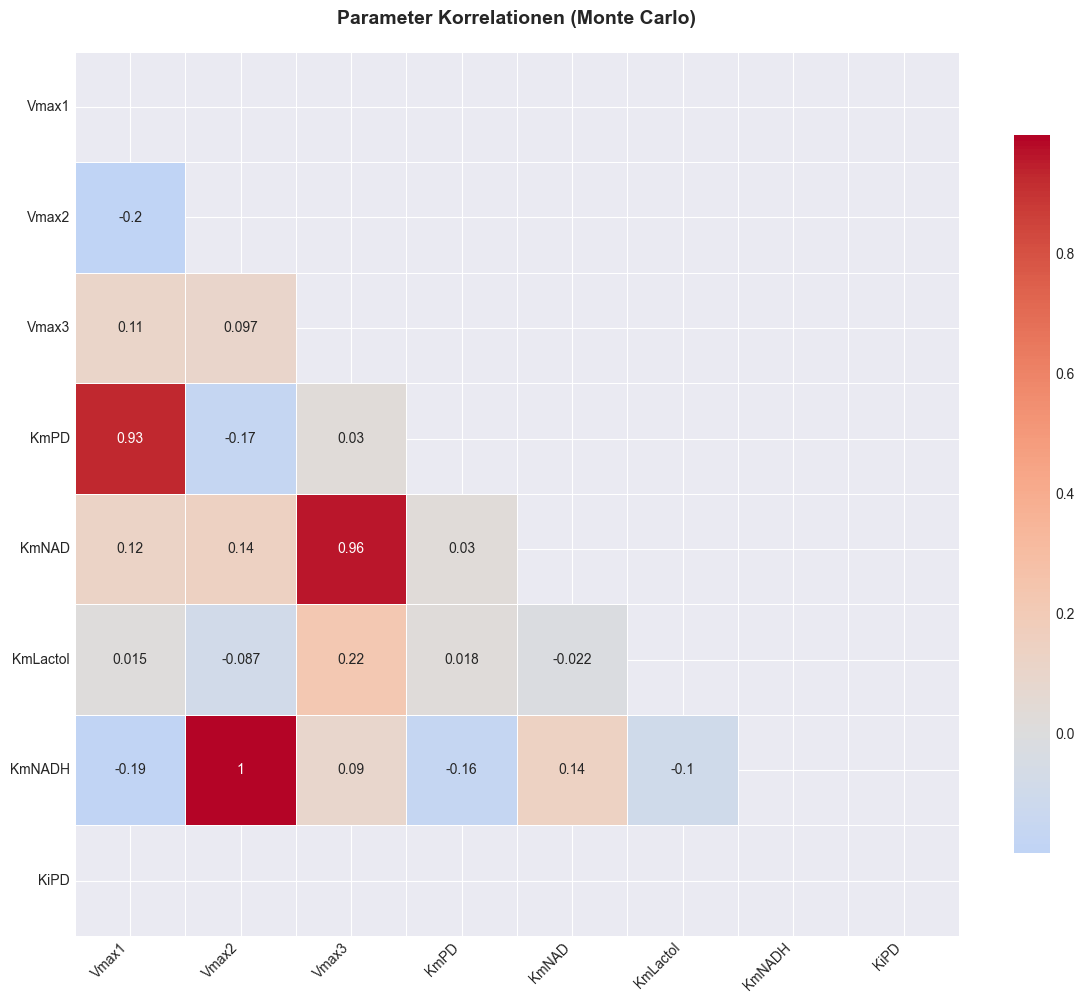

In [5]:
import os
import shutil
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import pickle

import random

from data_handler import  add_noise_reaction_dict, calculate_calibration, add_noise_calibration, create_concentrations_dict, create_reaction_rates_dict, get_rates_and_concentrations , make_fitting_data
from parameter_estimator_test import estimate_parameters, monte_carlo_simulation

from simulator import cadet_simulation_full_system

from plotter import plot_monte_carlo_results, create_monte_carlo_report, plot_fitting_quality, plot_parameter_convergence, plot_component_analysis



BASE_PATH = r"C:\Users\berger\Documents\Projekts\enzyme-cascade-analysis\Fehlerfortpflanzunganalyse"

calibration_data = pd.read_csv(os.path.join(BASE_PATH, 'Data', 'NADH_Kalibriergerade.csv'))
calibration_slope = calculate_calibration(calibration_data)

r1_path = os.path.join(BASE_PATH, 'Data', 'Reaction1')
r1_nad_data = pd.read_csv(os.path.join(r1_path, 'r_1_NAD_PD_500mM.csv'))
r1_pd_data = pd.read_csv(os.path.join(r1_path, 'r1_PD_NAD_5mM.csv'))


r2_path = os.path.join(BASE_PATH, 'Data', 'Reaction2')
r2_hp_data = pd.read_csv(os.path.join(r2_path, 'r_2_HP_NADH_06mM.csv'))
r2_nadh_data = pd.read_csv(os.path.join(r2_path, 'r_2_NADH_HP_300mM.csv'))
r2_pd_data = pd.read_csv(os.path.join(r2_path, 'r_2_PD_NADH_06mM_HP_300mM.csv'))

r3_path = os.path.join(BASE_PATH, 'Data', 'Reaction3')
r3_lactol = pd.read_csv(os.path.join(r3_path, 'r_3_Lactol_NAD_5mM.csv'))
r3_nad = pd.read_csv(os.path.join(r3_path, 'r_3_NAD_Lactol_500mM.csv'))


full_system_data = {
    "r1": {
        "c1": r1_nad_data,
        "c2": r1_pd_data
    },
    "r2": {
        "c1": r2_hp_data,
        "c2": r2_nadh_data,
        "c3": r2_pd_data
    },
    "r3": {
        "c1": r3_lactol,
        "c2": r3_nad
    }
}


full_system_param = {
    "r1": {
        "Vf_well": 10.0,
        "Vf_prod": 1.0,
        "c_prod": 2.2108,
        "c1_const": 5.0,
        "c2_const": 500.0
    },
    "r2": {
        "Vf_well": 10.0,
        "Vf_prod": 5.0,
        "c_prod": 2.15,
        "c1_const": 300.0,
        "c2_const": 0.6,
        "c3_const": 0.0
    },
    "r3": {
        "Vf_well": 10.0,
        "Vf_prod": 10.0,
        "c_prod": 2.15,
        "c1_const": 500.0,
        "c2_const": 5.0
    },
    "x_dimension": 3,
    "y_dimension": 1
}

df = get_rates_and_concentrations(
    full_system_data,
    calibration_slope,
    full_system_param
)

# Stelle sicher, dass das Results-Verzeichnis existiert
os.makedirs('Results', exist_ok=True)

# Speichere im Results-Ordner
csv_path = os.path.join('Results', "full_system_processed_reaction_data.csv")
pkl_path = os.path.join('Results', "full_system_processed_reaction_data.pkl")

df.to_csv(csv_path, index=True)
df.to_pickle(pkl_path)

print(f" Verarbeitete Reaktionsdaten gespeichert:")
print(f"   CSV: {csv_path}")
print(f"   PKL: {pkl_path}")

def full_reaction_system(concentration_data, Vmax1, Vmax2, Vmax3, KmPD, KmNAD, KmLactol, KmNADH, KiPD):
    """
    Wrapper für curve_fit Kompatibilität - nimmt flache Parameter entgegen
    Berechnet die Enzymaktivität für das vollständige Drei-Reaktions-System
    
    ALLE DREI REAKTIONEN:
    - Reaktion 1: PD + NAD → Pyruvat + NADH
    - Reaktion 2: Lactol + NADH → ... (mit PD/NAD Inhibition)
    - Reaktion 3: Lactol + NAD → ... (mit Lactol Inhibition)
    """
    # Entpacke Substratkonzentrationen, Inhibitor-Konzentrationen und Reaktions-IDs
    S1, S2, Inhibitor, reaction_ids = concentration_data
    
    # Initialisiere Ergebnis-Array
    V_obs = np.zeros_like(S1, dtype=float)
    
    # Reaktion 1: PD + NAD → HD + NADH
    reaction_1_mask = (reaction_ids == 1)
    if np.any(reaction_1_mask):
        # S1 = NAD oder konstante NAD, S2 = PD oder konstante PD
        S1_r1 = S1[reaction_1_mask] # NAD
        S2_r1 = S2[reaction_1_mask] # PD
        
        V_obs[reaction_1_mask] = (Vmax1 * S1_r1 * S2_r1) / (
            (KmPD + S2_r1) *  (KmNAD + S1_r1)
        )
    
    # Reaktion 2: Lactol + NADH → ... (mit PD Inhibition)
    reaction_2_mask = (reaction_ids == 2)
    if np.any(reaction_2_mask):
        S1_r2 = S1[reaction_2_mask]  # Lactol
        S2_r2 = S2[reaction_2_mask]  # NADH
        V_obs[reaction_2_mask] = (Vmax2 * S1_r2 * S2_r2) / (
            (KmLactol  + S1_r2) * (KmNADH  + S2_r2)
        )
    # Reaktion 3: Lactol + NAD 
    reaction_3_mask = (reaction_ids == 3)
    if np.any(reaction_3_mask):
        S1_r3 = S1[reaction_3_mask]  # Lactol
        S2_r3 = S2[reaction_3_mask]  # NAD
        V_obs[reaction_3_mask] = (Vmax3 * S1_r3 * S2_r3) / (
            (KmLactol  + S1_r3) * (KmNAD + S2_r3)
        )
    
    return V_obs


full_reaction_system_model_info = {
    "name": "full_reaction_system",
    "function": full_reaction_system,
    "param_names": [
        "Vmax1", "Vmax2", "Vmax3",
        "KmPD", "KmNAD", "KmLactol", "KmNADH",
        "KiPD"
    ],
    "param_units": [
        "U", "U", "U",
        "mM", "mM", "mM", "mM",
        "mM"
    ],
    "substrate_keys": ["S1", "S2", "Inhibitor", "reaction_ids"],
    "initial_guess_func": lambda activities, substrate_data: [
        max(activities) if len(activities) > 0 else 1.0,  # Vmax1
        max(activities) if len(activities) > 0 else 1.0,  # Vmax2
        max(activities) if len(activities) > 0 else 1.0,  # Vmax3
        84.0,  # KmPD
        2.2,  # KmNAD
        75.0,  # KmLactol
        2.0,  # KmNADH
        90.0  # KiPD
    ],
    "bounds_lower": [0]*8,
    "bounds_upper": [np.inf]*8,
    "description": "Komplettes Drei-Reaktions-System mit Inhibitionen"
}

noise_level = {
    "calibration": 0.00,
    "reaction": 0.00,
}
simulation_dir = "Results/Simulations"

if os.path.exists(simulation_dir):
    shutil.rmtree(simulation_dir)
    print(f"Simulations-Ordner gelöscht: {simulation_dir}")

monte_carlo_results = monte_carlo_simulation(
    calibration_data,
    full_system_data,
    full_reaction_system_model_info,
    full_system_param,
    noise_level,
    n_iterations=100
)

available_params = []
for param_name in param_names:
    if f'{param_name}_values' in monte_carlo_results:
        available_params.append(param_name)

plt.figure(figsize=(12, 10))
    
# Erstelle Korrelationsmatrix
corr_matrix = monte_carlo_results['correlation_matrix']

# Heatmap (nur für verfügbare Parameter)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Obere Dreiecksmatrix ausblenden
sns.heatmap(corr_matrix, 
            mask=mask,
            annot=True, 
            cmap='coolwarm', 
            center=0,
            square=True, 
            linewidths=0.5,
            xticklabels=available_params,
            yticklabels=available_params,
            cbar_kws={"shrink": 0.8})

plt.title('Parameter Korrelationen (Monte Carlo)', fontsize=14, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()